In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

souillac mu
rabo de peixe pt
farafangana mg
kapaa us
thompson ca
sfantu gheorghe ro
half moon bay us
hirara jp
atuona pf
vaitupu wf
busselton au
longyearbyen sj
new norfolk au
vlasim cz
bukachacha ru
port elizabeth za
castro cl
illoqqortoormiut gl
umm lajj sa
punta arenas cl
rikitea pf
hobart au
saint-philippe re
butaritari ki
bluff nz
nelson bay au
faanui pf
urucara br
atuona pf
carnarvon au
illoqqortoormiut gl
victoria sc
ilulissat gl
ushuaia ar
viedma ar
bluff nz
walvis bay na
wasilla us
alofi nu
vaini to
mimongo ga
misratah ly
vaini to
mount isa au
saint george bm
mataura pf
novorudnyy ru
bethel us
longyearbyen sj
east london za
illoqqortoormiut gl
concordia mx
port-de-bouc fr
tuktoyaktuk ca
lebu cl
avera pf
ushuaia ar
khatanga ru
umzimvubu za
new norfolk au
mount gambier au
santa fe cu
barrow us
torbay ca
wonthaggi au
mataura pf
bredasdorp za
kodiak us
atuona pf
grindavik is
snasa no
hofn is
bluff nz
busselton au
aswan eg
norman wells ca
mahina pf
mar del plata ar
korla cn
canutam

chokurdakh ru
flinders au
rutland us
bonfim br
am timan td
mar del plata ar
nemuro jp
chimoio mz
saskylakh ru
prachuap khiri khan th
east london za
flagstaff us
illoqqortoormiut gl
busselton au
tasiilaq gl
salalah om
severo-kurilsk ru
asau tv
salalah om
zarate ar
amderma ru
tasiilaq gl
castro cl
arman ru
saskylakh ru
itagi br
asau tv
prachuap khiri khan th
muros es
busselton au
tahta eg
seoul kr
ushuaia ar
saskylakh ru
hobart au
bluff nz
port keats au
bredasdorp za
sorvag fo
vostok ru
nanortalik gl
rawson ar
turukhansk ru
bud no
ajaccio fr
esperance au
caravelas br
grand river south east mu
sulangan ph
kenai us
kaffrine sn
hilo us
sept-iles ca
albany au
bonavista ca
kot khai in
ilulissat gl
shahrud ir
castro cl
luderitz na
verkhnyaya inta ru
busselton au
punta arenas cl
norman wells ca
saskylakh ru
saldanha za
chapais ca
los llanos de aridane es
port elizabeth za
cabedelo br
puri in
yatou cn
mys shmidta ru
siparia tt
naryan-mar ru
xochihuehuetlan mx
husavik is
vaini to
hermanus za
mys 

cape town za
pevek ru
taolanaro mg
hobart au
pueblo nuevo pe
daru pg
umzimvubu za
taolanaro mg
longyearbyen sj
mar del plata ar
nelson bay au
carnarvon au
atuona pf
mys shmidta ru
yinchuan cn
jamestown sh
bambous virieux mu
san jose ph
brae gb
novomikhaylovskiy ru
sao jose da coroa grande br
cidreira br
cabo san lucas mx
busselton au
paracuru br
port alfred za
metro id
sola vu
bluff nz
tuktoyaktuk ca
ushuaia ar
albany au
itaituba br
busselton au
ushuaia ar
qaanaaq gl
port elizabeth za
vasilyevskiy mokh ru
denpasar id
chokurdakh ru
jamestown sh
katsuura jp
rudnya ru
komsomolskiy ru
omboue ga
tiksi ru


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fb7291807f7c8a0d11cafe6a7d922fe


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 41 of Set 23 | souillac
Processing Record 42 of Set 23 | rabo de peixe
Processing Record 43 of Set 23 | farafangana
Processing Record 44 of Set 23 | kapaa
Processing Record 45 of Set 23 | thompson
Processing Record 46 of Set 23 | sfantu gheorghe
Processing Record 47 of Set 23 | half moon bay
Processing Record 48 of Set 23 | hirara
Processing Record 49 of Set 23 | atuona
Processing Record 50 of Set 23 | vaitupu
City not found. Skipping...
Processing Record 51 of Set 23 | busselton
Processing Record 52 of Set 23 | longyearbyen
Processing Record 53 of Set 23 | new norfolk
Processing Record 54 of Set 23 | vlasim
Processing Record 55 of Set 23 | bukachacha
Processing Record 56 of Set 23 | port elizabeth
Processing Record 57 of Set 23 | castro
Processing Record 58 of Set 23 | illoqqortoormiut
City not found. Skipping...
Processing Record 59 of Set 23 | umm lajj
Processing Record 60 of Set 23 | punta arenas
Processing Record 61 of Set 23 | rikitea
Processing Record 62 of Set

Processing Record 33 of Set 26 | guarapari
Processing Record 34 of Set 26 | dikson
Processing Record 35 of Set 26 | harper
Processing Record 36 of Set 26 | isangel
Processing Record 37 of Set 26 | qandahar
City not found. Skipping...
Processing Record 38 of Set 26 | tacuarembo
Processing Record 39 of Set 26 | betsiamites
Processing Record 40 of Set 26 | nouakchott
Processing Record 41 of Set 26 | preobrazheniye
Processing Record 42 of Set 26 | manokwari
Processing Record 43 of Set 26 | qaanaaq
Processing Record 44 of Set 26 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 26 | luancheng
Processing Record 46 of Set 26 | wucheng
Processing Record 47 of Set 26 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 26 | matay
Processing Record 49 of Set 26 | saldanha
Processing Record 50 of Set 26 | seoul
Processing Record 1 of Set 27 | kavaratti
Processing Record 2 of Set 27 | pangnirtung
Processing Record 3 of Set 27 | sentyabrskiy
City not found. Skipping

Processing Record 16 of Set 30 | shahrud
Processing Record 17 of Set 30 | verkhnyaya inta
Processing Record 18 of Set 30 | chapais
Processing Record 19 of Set 30 | los llanos de aridane
Processing Record 20 of Set 30 | cabedelo
Processing Record 21 of Set 30 | puri
Processing Record 22 of Set 30 | yatou
Processing Record 23 of Set 30 | siparia
Processing Record 24 of Set 30 | naryan-mar
Processing Record 25 of Set 30 | xochihuehuetlan
Processing Record 26 of Set 30 | husavik
Processing Record 27 of Set 30 | engerwitzdorf
Processing Record 28 of Set 30 | klisura
Processing Record 29 of Set 30 | morehead
Processing Record 30 of Set 30 | tiksi
Processing Record 31 of Set 30 | outjo
Processing Record 32 of Set 30 | amapa
Processing Record 33 of Set 30 | buala
Processing Record 34 of Set 30 | victoria point
Processing Record 35 of Set 30 | carmen de viboral
Processing Record 36 of Set 30 | marsh harbour
Processing Record 37 of Set 30 | barawe
City not found. Skipping...
Processing Record 38

Processing Record 1 of Set 34 | camocim
Processing Record 2 of Set 34 | naze
Processing Record 3 of Set 34 | tubuala
Processing Record 4 of Set 34 | krasnoslobodsk
Processing Record 5 of Set 34 | biak
Processing Record 6 of Set 34 | morbegno
Processing Record 7 of Set 34 | kudat
Processing Record 8 of Set 34 | lahaina
Processing Record 9 of Set 34 | chagda
City not found. Skipping...
Processing Record 10 of Set 34 | karkaralinsk
City not found. Skipping...
Processing Record 11 of Set 34 | saint-paul
Processing Record 12 of Set 34 | gossas
Processing Record 13 of Set 34 | paamiut
Processing Record 14 of Set 34 | celestun
Processing Record 15 of Set 34 | french harbor
Processing Record 16 of Set 34 | sweetwater
Processing Record 17 of Set 34 | gamba
Processing Record 18 of Set 34 | sao miguel do araguaia
Processing Record 19 of Set 34 | brae
Processing Record 20 of Set 34 | dalvik
Processing Record 21 of Set 34 | el tocuyo
Processing Record 22 of Set 34 | la oroya
Processing Record 23 of

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.5167,57.5167,84.20,70,75,16.11,MU,2021-02-26 08:09:31
1,Rabo De Peixe,37.8000,-25.5833,57.20,94,75,11.50,PT,2021-02-26 08:09:32
2,Farafangana,-22.8167,47.8333,84.83,70,27,8.14,MG,2021-02-26 08:09:32
3,Kapaa,22.0752,-159.3190,73.40,73,75,20.71,US,2021-02-26 08:09:32
4,Thompson,55.7435,-97.8558,-16.60,69,90,18.41,CA,2021-02-26 08:09:32
5,Sfantu Gheorghe,45.8667,25.7833,41.00,57,0,23.00,RO,2021-02-26 08:09:33
6,Half Moon Bay,37.4636,-122.4286,50.00,87,1,3.44,US,2021-02-26 08:09:33
7,Hirara,24.8000,125.2833,75.20,83,40,10.36,JP,2021-02-26 08:09:33
8,Atuona,-9.8000,-139.0333,79.25,81,2,16.55,PF,2021-02-26 08:09:33
9,Busselton,-33.6500,115.3333,75.99,58,46,3.00,AU,2021-02-26 08:09:34


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1614327571.5445547

In [21]:
today = time.strftime("%x")
today


'02/26/21'

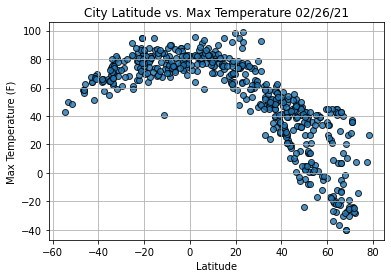

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

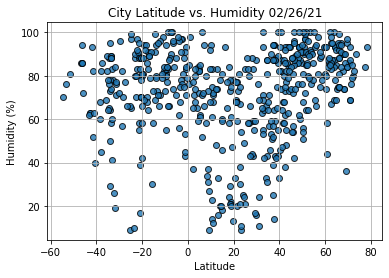

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

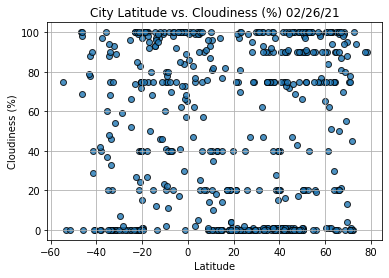

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

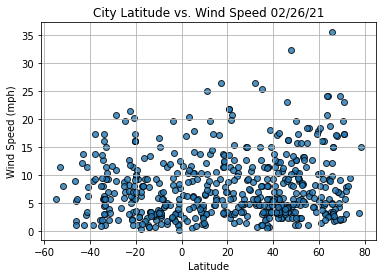

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                   Bukachacha
Lat                       52.9833
Lng                       116.917
Max Temp                     6.53
Humidity                       90
Cloudiness                    100
Wind Speed                   8.37
Country                        RU
Date          2021-02-26 08:09:35
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
530    False
531     True
532     True
533     True
534    False
Name: Lat, Length: 535, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rabo De Peixe,37.8000,-25.5833,57.2,94,75,11.50,PT,2021-02-26 08:09:32
3,Kapaa,22.0752,-159.3190,73.4,73,75,20.71,US,2021-02-26 08:09:32
4,Thompson,55.7435,-97.8558,-16.6,69,90,18.41,CA,2021-02-26 08:09:32
5,Sfantu Gheorghe,45.8667,25.7833,41.0,57,0,23.00,RO,2021-02-26 08:09:33
6,Half Moon Bay,37.4636,-122.4286,50.0,87,1,3.44,US,2021-02-26 08:09:33


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

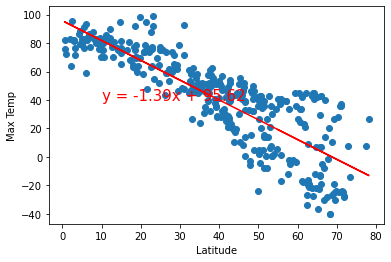

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

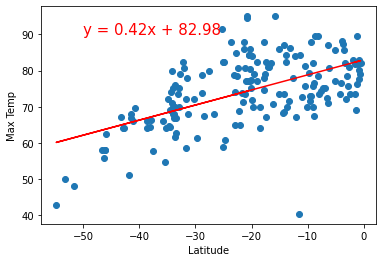

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

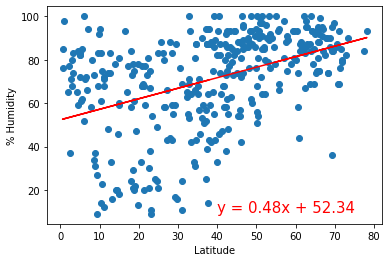

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

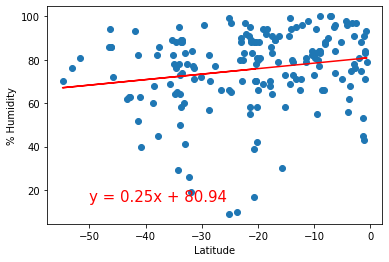

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

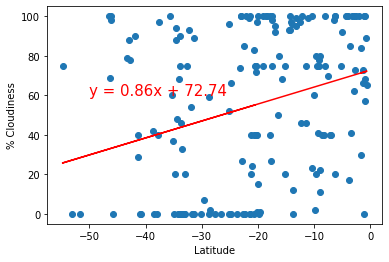

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

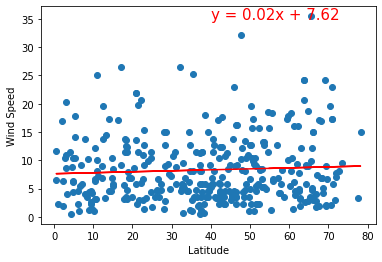

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

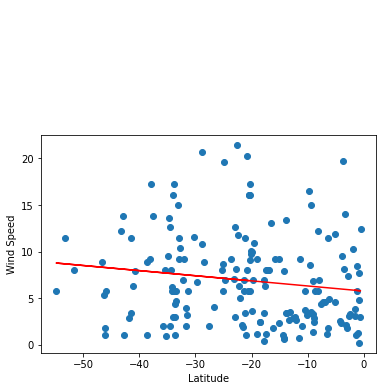

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))